In [1]:
from samana.Data.wfi2033 import WFI2033_NIRCAM
from samana.Model.wfi2033_model_nircam import WFI2033NircamModelEPLM3M4ShearObservedConvention
import numpy as np
import h5py
import matplotlib.pyplot as plt
from lenstronomy.Workflow.fitting_sequence import FittingSequence
from lenstronomy.Data.coord_transforms import Coordinates

In [ ]:
# filename = "psf_F115W_PSFr_stack_2.hdf5"
# with h5py.File(filename, "r") as f:
#     psf_init_starred_r = np.array(f['kernel_point_source'])
#     psf_variance_map_starred = np.array(f['psf_error_map'])
# f.close()
# psf_init_starred_r *= np.sum(psf_init_starred_r) ** -1
# plt.imshow(np.log10(psf_init_starred_r)); plt.show()
# data = WFI2033_NIRCAM()
# data_psf = data.kwargs_data_joint['multi_band_list'][0][1]['kernel_point_source']
# plt.imshow(np.log10(data_psf))


In [2]:
super_sampling_factor=1
data = WFI2033_NIRCAM(super_sampling_factor)
model = WFI2033NircamModelEPLM3M4ShearObservedConvention(data, shapelets_order=22)
kwargs_lens_macro_init = None
observed_convention_index = [3]
kwargs_model, _, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init,
                                                observed_convention_index=observed_convention_index)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)
fitting_sequence = FittingSequence(data.kwargs_data_joint, kwargs_model, model.kwargs_constraints, 
                                  model.kwargs_likelihood, kwargs_params)

nthreads = 10
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, ['a4_a', 'a3_a','a1_a','delta_phi_m1','delta_phi_m3','delta_phi_m4'], [0.0, 0.0,0.0, 0.0, 0.0,0.0]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 20, 'n_iterations': 100, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 1, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 20, 'n_iterations': 50, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 4, 'keep_psf_error_map': True}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 50, 'n_iterations': 50, 'threadCount': nthreads}],
       # ['MCMC', {'n_burn': 120, 'n_run': 40, 'walkerRatio': 2, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list = fitting_sequence.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_sequence.best_fit()

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


Computing the PSO ...


  0%|                                                                                                                                                                                                                           | 0/100 [00:00<?, ?it/s]/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluation

Max iteration reached! Stopping.
-1.5355588330178465 reduced X^2 of best position
-14996.267563252288 log likelihood
19532 effective number of data points
[{'theta_E': 1.034416688811214, 'gamma': 2.222439158724881, 'e1': -0.05419088229881736, 'e2': 0.1791133368680876, 'center_x': 0.0042936568770495535, 'center_y': -0.02372911099849357, 'a1_a': 0.0, 'delta_phi_m1': 0.0, 'a3_a': 0.0, 'delta_phi_m3': 0.0, 'a4_a': 0.0, 'delta_phi_m4': 0.0}, {'gamma1': 0.17547184612252334, 'gamma2': -0.0665153690014992, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.07845807294866024, 'center_x': 0.28027595473196987, 'center_y': 2.006037629139654}, {'theta_E': 0.7858166887369691, 'center_x': -3.8518451378292147, 'center_y': -0.20070446467552294}] lens result
[{'amp': 1, 'R_sersic': 1.4894775341156394, 'n_sersic': 1.9252693931272413, 'e1': 0.02347336473772629, 'e2': 0.15626114357056015, 'center_x': -0.5492095060886202, 'center_y': 0.03541153308531928}, {'amp': 1, 'n_max': 22, 'beta': 0.21399269795410963, 'center_

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


-1.5093939299649923 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.5093939299604286
(38, ['gamma_lens0', 'gamma1_lens1', 'gamma2_lens1', 'theta_E_lens2', 'theta_E_lens3', 'center_x_lens3', 'center_y_lens3', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'R_sersic_lens_light1', 'n_sersic_lens_light1', 'e1_lens_light1', 'e2_lens_light1', 'R_sersic_lens_light2', 'n_sersic_lens_light2', 'center_x_lens_light2', 'center_y_lens_light2', 'R_sersic_lens_light3', 'n_sersic_lens_light3', 'center_x_lens_light3', 'center_y_lens_light3', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:1120: RuntimeWarning: invalid value encountered in log10
  np.log10(model),


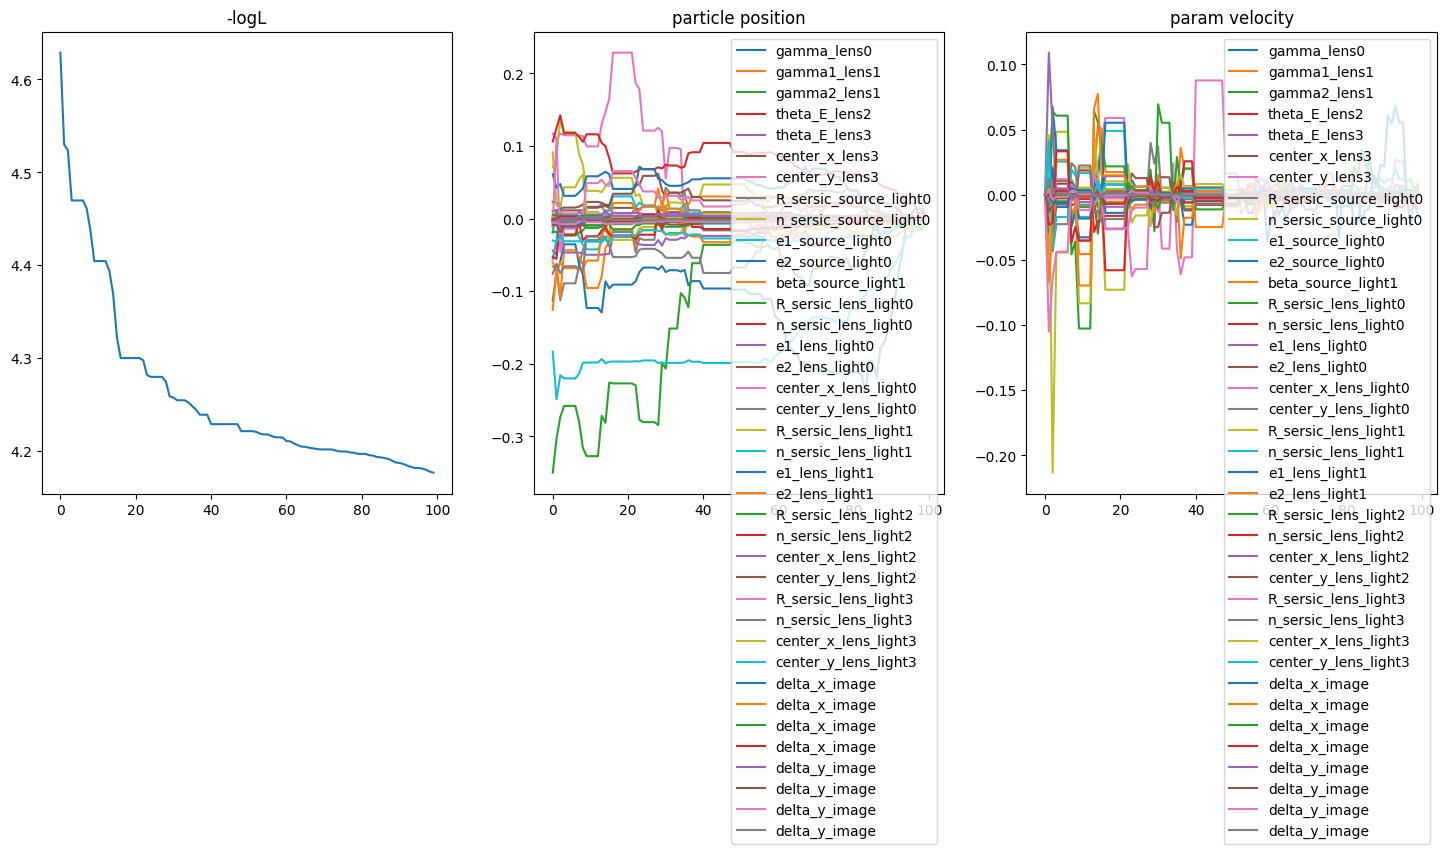

<Figure size 640x480 with 0 Axes>

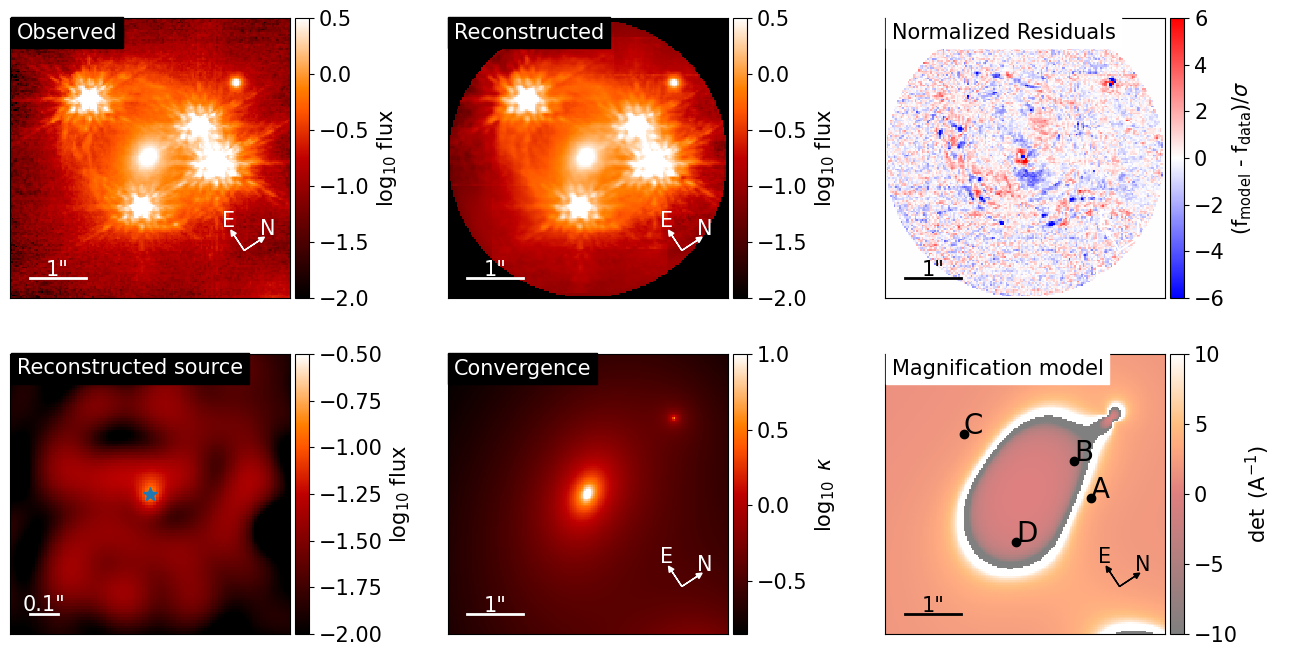

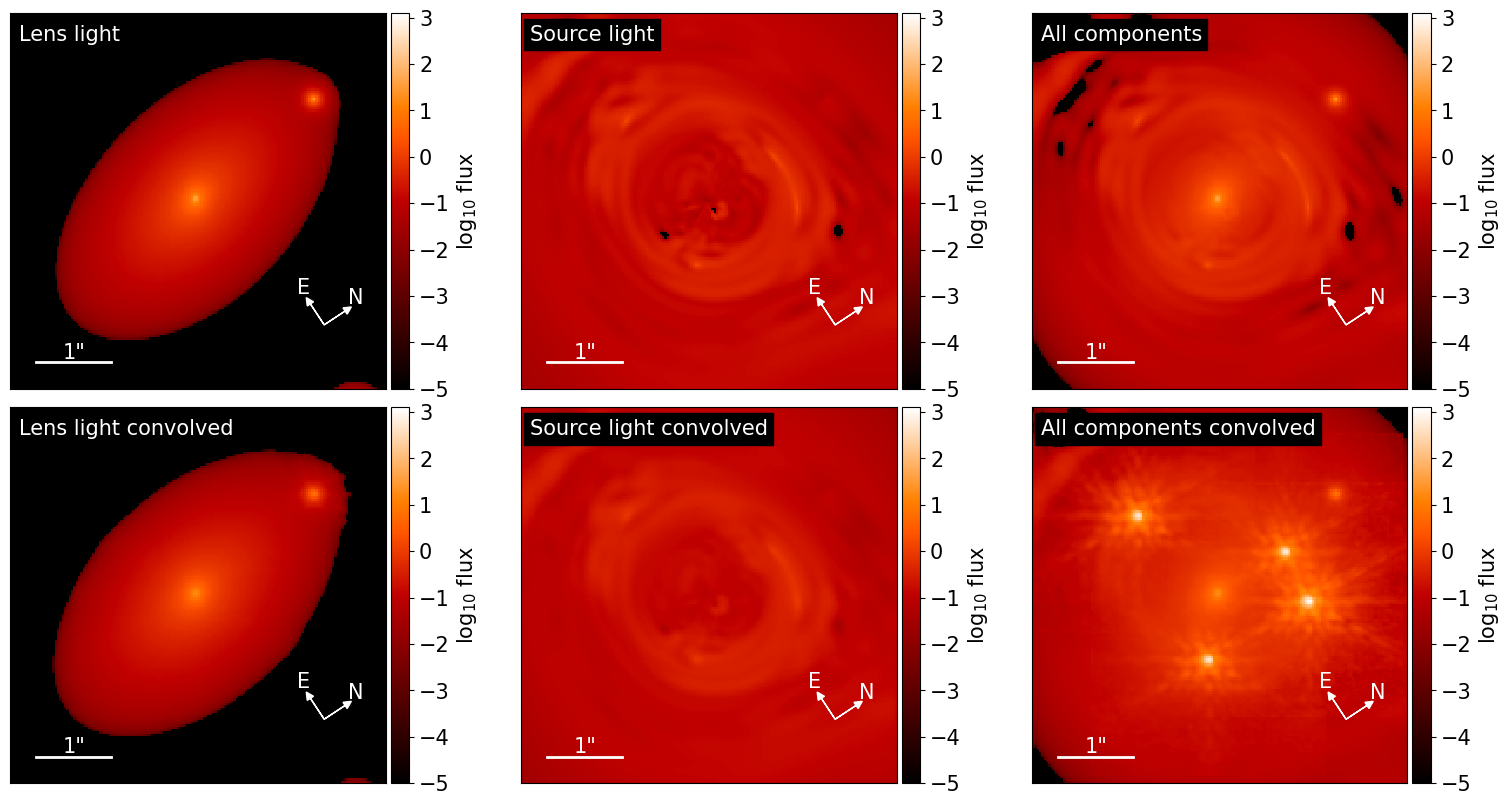

{'kwargs_lens': [{'theta_E': 1.034416688811214, 'gamma': 2.222439158724881, 'e1': -0.05419088229881736, 'e2': 0.1791133368680876, 'center_x': 0.0042936568770495535, 'center_y': -0.02372911099849357, 'a1_a': 0.0, 'delta_phi_m1': 0.0, 'a3_a': 0.0, 'delta_phi_m3': 0.0, 'a4_a': 0.0, 'delta_phi_m4': 0.0}, {'gamma1': 0.17547184612252334, 'gamma2': -0.0665153690014992, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.07845807294866024, 'center_x': 0.28027595473196987, 'center_y': 2.006037629139654}, {'theta_E': 0.7858166887369691, 'center_x': -3.8518451378292147, 'center_y': -0.20070446467552294}], 'kwargs_source': [{'amp': 112.2720914290696, 'R_sersic': 1.4894775341156394, 'n_sersic': 1.9252693931272413, 'e1': 0.02347336473772629, 'e2': 0.15626114357056015, 'center_x': -0.5492095060886202, 'center_y': 0.03541153308531928}, {'amp': array([-2.49968462e+03, -9.53918766e+00, -3.80623822e+01, -6.34214302e+02,
       -2.49743528e+02, -4.62203776e+02, -2.60315699e+01,  1.42489551e+01,
       -1.74548469e+

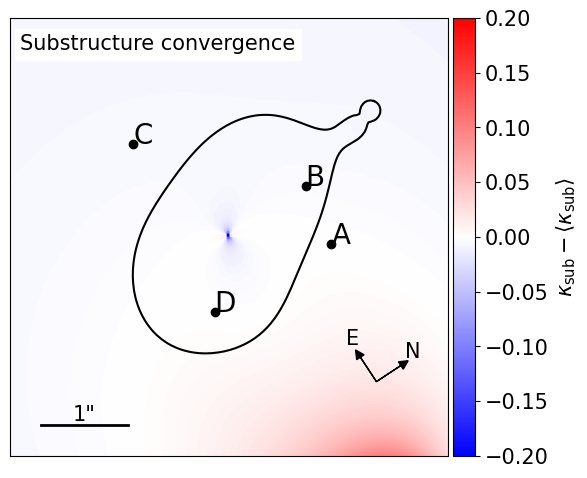

In [3]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt

multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat",
                      image_likelihood_mask_list=[data.likelihood_mask],fast_caustic=True)

param_class = fitting_sequence.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0], v_min=-2, v_max=0.5)
modelPlot.model_plot(ax=axes[0,1], v_min=-2, v_max=0.5)
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-6, v_max=6)
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100, v_min=-2, v_max=-0.5)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = plt.subplot(111)
kwargs_plot = {'ax': ax,
               'index_macromodel': [0, 1,2,3], 
              'with_critical_curves': True,
              'v_min': -0.2,'v_max': 0.2}
modelPlot.substructure_plot(band_index=0, **kwargs_plot)
print(kwargs_result)
print(kwargs_result['kwargs_lens'])


In [ ]:
from lenstronomy.LensModel.lens_model import LensModel
from copy import deepcopy
lens_model = LensModel(kwargs_model['lens_model_list'], 
                      lens_redshift_list=kwargs_model['lens_redshift_list'], z_source=kwargs_model['z_source'],
                      observed_convention_index=kwargs_model['observed_convention_index'], multi_plane=True)
center_x_phys = []
center_y_phys = []

for (dx, dy) in zip(np.random.normal(0.0, 0.05, 1000), np.random.normal(0.0, 0.05, 1000)):
    kw = deepcopy(kwargs_result['kwargs_lens'])
    #print(kw[3]['center_x'],kw[3]['center_y'])
    kw[3]['center_x'] += dx*0
    kw[3]['center_y'] += dy*0
    kwargs_phys = lens_model.lens_model._convention(kw)
    center_x_phys.append(kwargs_phys[3]['center_x'])
    center_y_phys.append(kwargs_phys[3]['center_y'])
    

print(np.median(center_x_phys))
#plt.hist(center_x_phys,bins=35); plt.show()
print(kwargs_phys[3]['theta_E'])
print(np.median(center_y_phys))
#plt.hist(center_y_phys,bins=35); plt.show()

In [ ]:
fig = plt.figure(1)
ax = plt.subplot(111)
modelPlot._arrow_size = 0
v_min = -2.
v_max = v_min + 2.5
modelPlot.decomposition_plot(ax=ax, text='Source light convolved', unconvolved=False, 
                             source_add=True, v_min=v_min, v_max=v_max,cmap='bone')

fig = plt.figure(2)
ax = plt.subplot(111)
modelPlot._arrow_size = 0
v_min = -1.5
v_max = v_min + 1.5
modelPlot.source_plot(ax=ax, deltaPix_source=0.005, numPix=300, v_min=-2.8, v_max=-1,cmap='bone')

In [ ]:
# plt.imshow(np.log10(fitting_sequence.multi_band_list[0][1]['kernel_point_source']), origin='lower',vmin=-6,vmax=-1)
# plt.show()
# plt.imshow(np.log10(fitting_sequence.multi_band_list[0][1]['psf_variance_map']), origin='lower')
# plt.show()
# plt.imshow(np.log10(fitting_sequence.multi_band_list[0][1]['kernel_point_source_init']),origin='lower')

# import sys
# import os
# np.set_printoptions(threshold=sys.maxsize)
# path_to_data = os.getenv('HOME')+'/Code/samana/samana/Data/ImageData/'
# with open(path_to_data+'wfi2033_f115W.py', 'w') as f:
#     f.write('import numpy as np\n\n')
#     f.write('image_data = np.'+str(repr(data.kwargs_data['image_data'])))
#     f.write('\n')
#     f.write('psf_model = np.'+str(repr(fitting_sequence.multi_band_list[0][1]['kernel_point_source'])))
#     f.write('\n')
#     f.write('psf_model_init = np.'+str(repr(fitting_sequence.multi_band_list[0][1]['kernel_point_source_init'])))
#     f.write('\n')
#     f.write('psf_error_map = np.'+str(repr(fitting_sequence.multi_band_list[0][1]['psf_variance_map'])))
#     f.write('\n')
# f.close()

In [ ]:
# from lenstronomy.LensModel.lens_model import LensModel
# from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver

# fig = plt.figure()
# ax = plt.subplot(111)
# ax = modelPlot.normalized_residual_plot(ax=ax, v_min=-6, v_max=6)
# plt.show()

# point_of_interest_x1 = 0.99
# point_of_interest_y1 = -1.

# lens_model = LensModel(kwargs_model['lens_model_list'], 
#                       lens_redshift_list=kwargs_model['lens_redshift_list'], z_source=kwargs_model['z_source'],
#                       observed_convention_index=kwargs_model['observed_convention_index'], multi_plane=True)
# solver = LensEquationSolver(lens_model)
# coords = Coordinates(data.kwargs_data['transform_pix2angle'], 
#                      data.kwargs_data['ra_at_xy_0'], 
#                      data.kwargs_data['dec_at_xy_0'])
# plt.imshow(np.log10(data.kwargs_data['image_data']),origin='lower',vmin=-2,vmax=1)
# x_image_pix, y_image_pix = coords.map_coord2pix(data.x_image, data.y_image)

# x_points = [point_of_interest_x1]
# y_points = [point_of_interest_y1]
# colors = ['k', 'b', 'r']

# for (point_x, point_y, col) in zip(x_points, y_points, colors):


#     xp, yp = coords.map_coord2pix(point_x, point_y)
#     plt.scatter(xp, yp, color=col,alpha=1,marker='o',s=10)
    
#     beta_x, beta_y = lens_model.ray_shooting(point_x, point_y, kwargs_result['kwargs_lens'])
#     print(beta_x, beta_y)

#     xpsol, ypsol = solver.image_position_lenstronomy(beta_x, beta_y, kwargs_result['kwargs_lens'],
#                                                     min_distance=0.05, non_linear=True)
#     print(xpsol, ypsol)
    
#     xpsol, ypsol = coords.map_coord2pix(xpsol, ypsol)
#     plt.scatter(xpsol, ypsol, color=col,alpha=0.8,marker='x',s=15)
# plt.show()



In [ ]:
# from lenstronomy.LensModel.lens_model import LensModel

# lens_model = LensModel(kwargs_model['lens_model_list'], 
#                       lens_redshift_list=kwargs_model['lens_redshift_list'], 
#                       multi_plane=kwargs_model['multi_plane'], 
#                       z_source=kwargs_model['z_source'],
#                       observed_convention_index=[3])
# mcmc_samples = chain_list[1][1]
# n_samples = 400
# count = 0
# magnifications = np.empty((n_samples, 4))
# satellite_thetaE = []
# satellite_x = []
# satellite_y = []
# satellite_x_phys = []
# satellite_y_phys = []
# for i in np.random.randint(0, len(mcmc_samples), n_samples):
#     kwargs = param_class.args2kwargs(mcmc_samples[i,:])
#     kwargs_lens = kwargs['kwargs_lens']
#     kwargs_ps = kwargs['kwargs_ps']
#     ximg, yimg = kwargs_ps[0]['ra_image'], kwargs_ps[0]['dec_image']
#     magnifications[count,:] = np.absolute(lens_model.magnification(ximg, yimg, kwargs_lens))
#     satellite_thetaE.append(kwargs_lens[3]['theta_E'])
#     satellite_x.append(kwargs_lens[3]['center_x'])
#     satellite_y.append(kwargs_lens[3]['center_y'])
#     kwargs_phys = lens_model.lens_model._convention(kwargs_result['kwargs_lens'])
#     satellite_x_phys.append(kwargs_phys[3]['center_x'])
#     satellite_y_phys.append(kwargs_phys[3]['center_y'])
#     count += 1

# print('\n')
# print('measured flux ratios: ', np.array([0.72, 0.53, 0.61]))
# fr = magnifications[:,1:] / magnifications[:,0,np.newaxis]
# print('flux ratios: ', np.median(fr,axis=0))
# print('physical location: ', np.median(satellite_x_phys), np.median(satellite_y_phys))


# plt.scatter(satellite_thetaE, fr[:,0],color='k'); plt.ylim(0.65, 0.85); plt.show()
# plt.scatter(satellite_thetaE, fr[:,1],color='k'); plt.ylim(0.35, 0.55); plt.show()
# plt.scatter(satellite_thetaE, fr[:,2],color='k'); plt.ylim(0.3, 0.5); plt.show()

In [ ]:
print(model.beta_min, model.beta_max)